In [1]:
from sklearn.datasets import load_diabetes

In [2]:
import sumnplot as sp
from sumnplot.discretisation import QuantileDiscretiser
from sumnplot.summary import ColumnSummariser
from sumnplot.plot.matplotlib import (
    plot_summarised_variable,
    plot_summarised_variable_2way,
)

In [3]:
sp.__version__

'0.3.0'

# Set up data
Make the column `s1` positive so it can be treated as weights.

In [4]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [5]:
X["s1"] = X["s1"] - X["s1"].min()

In [6]:
X["age_bucketed"] = QuantileDiscretiser(variable="age").fit_transform(
    X, sample_weight=X["s1"]
)

In [7]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,age_bucketed
0,0.038076,0.050680,0.061696,0.021872,0.082557,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,"(0.0344, 0.0453]"
1,-0.001882,-0.044642,-0.051474,-0.026328,0.118332,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,"(-0.02, -0.00188]"
2,0.085299,0.050680,0.044451,-0.005671,0.081181,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,"(0.0666, 0.111]"
3,-0.089063,-0.044642,-0.011595,-0.036656,0.138971,0.024991,-0.036038,0.034309,0.022692,-0.009362,"(-0.108, -0.0565]"
4,0.005383,-0.044642,-0.036385,0.021872,0.130716,0.015596,0.008142,-0.002592,-0.031991,-0.046641,"(-0.00188, 0.00902]"


# One way summary plot

In [8]:
one_way_summary = ColumnSummariser._summarise_column(
    df=X,
    to_summarise_columns=["s1", "s2", "s3"],
    to_summarise_columns_labels=["obs", "p1", "p2"],
    to_summarise_divide_column="s1",
    by_column="age_bucketed",
)

In [9]:
one_way_summary

,obs,p1,p2
,sum,mean,mean
age_bucketed,,,
"(-0.108, -0.0565]",5.562977,-0.277312,0.037240
"(-0.0565, -0.0418]",5.950996,0.007357,0.013575
"(-0.0418, -0.02]",5.985395,-0.041834,0.080188
"(-0.02, -0.00188]",6.376166,0.048651,-0.035133
"(-0.00188, 0.00902]",5.546466,0.077404,0.013722
"(0.00902, 0.0199]",5.461157,-0.031601,0.045038
"(0.0199, 0.0344]",5.241004,-0.006048,-0.130038
"(0.0344, 0.0453]",5.495556,0.040513,0.027248


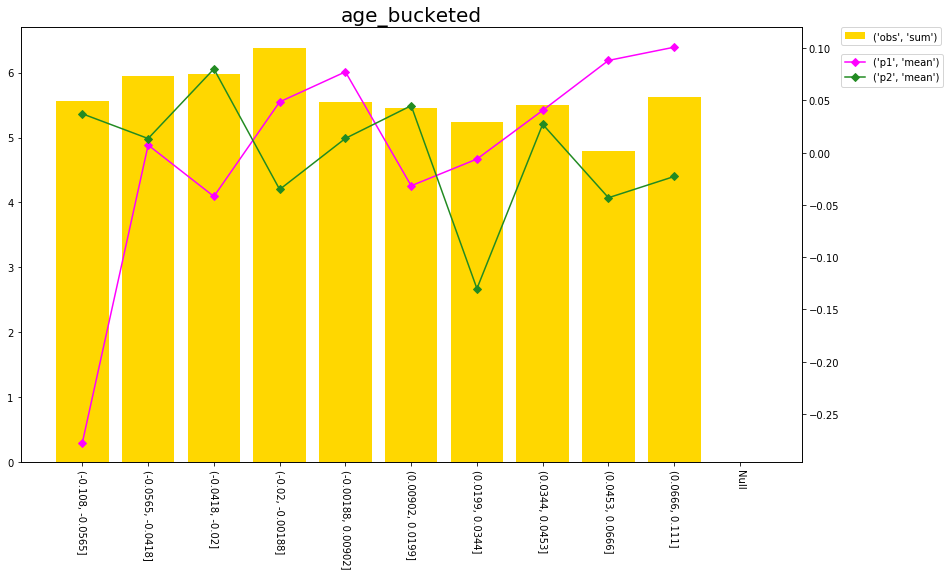

In [10]:
plot_summarised_variable(summary_df=one_way_summary, axis_right=0, axis_left=[1, 2])

# Two way summary plot

In [11]:
two_way_summary = ColumnSummariser._summarise_column(
    df=X,
    to_summarise_columns=["s1", "s2", "s3"],
    to_summarise_columns_labels=["obs", "p1", "p2"],
    to_summarise_divide_column="s1",
    by_column=sp.discretisation.QuantileDiscretiser(
        variable="age", quantiles=(0, 0.25, 0.5, 0.75, 1.0)
    ),
    second_by_column=sp.discretisation.QuantileDiscretiser(
        variable="bmi", quantiles=(0, 0.33, 0.66, 1.0)
    ),
)

In [12]:
two_way_summary

obs        p1        p2
                                            sum      mean      mean
age                bmi                                             
(-0.108, -0.0382]  (-0.0913, -0.0256]  4.440200 -0.414521  0.250709
                   (-0.0256, 0.0145]   3.431626 -0.062515 -0.157111
                   (0.0145, 0.171]     4.386538  0.122141 -0.054926
                   Null                     NaN       NaN       NaN
(-0.0382, 0.00538] (-0.0913, -0.0256]  4.568163 -0.190667  0.143534
                   (-0.0256, 0.0145]   4.341131  0.050317  0.015249
                   (0.0145, 0.171]     5.876695  0.149265 -0.103707
                   Null                     NaN       NaN       NaN
(0.00538, 0.0381]  (-0.0913, -0.0256]  3.338062 -0.110902  0.201433
                   (-0.0256, 0.0145]   5.461157  0.053028 -0.008168
                   (0.0145, 0.171]     5.349705  0.019374 -0.219759
                   Null                     NaN       NaN       NaN
(0.0381, 0.111]    (-0.0913, -0.0256]  3.551334  0.024506  0.230664
                   (-0.0256, 0.0145]   6.022546  0.138017  0.022771
                   (0.0145, 0.171]     5.269899  0.067062 -0.162052
                   Null                     NaN       NaN       NaN
Null               (-0.0913, -0.0256]       NaN       NaN       NaN
                   (-0.0256, 0.0145]        NaN       NaN       NaN
                   (0.0145, 0.171]          NaN       NaN       NaN
                   Null                     NaN       NaN       NaN

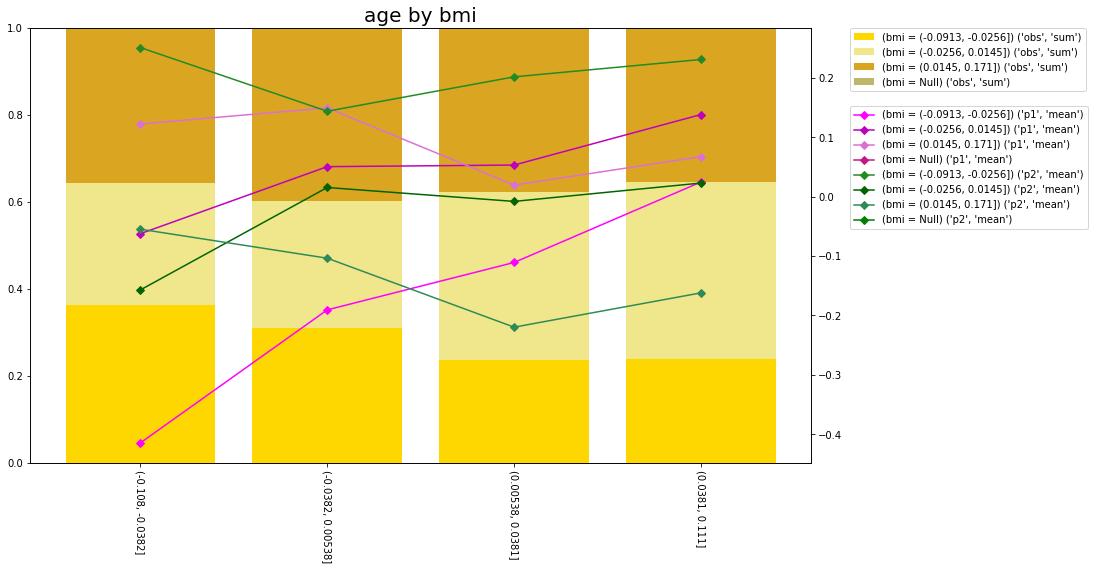

In [16]:
plot_summarised_variable_2way(
    two_way_summary,
    axis_right=0,
    axis_left=[1, 2],
    bar_type="stacked",
    bars_percent=True,
)